# Bilder

## Convolution (von Pixeln zum Feature)

In [5]:
#!poetry add opencv-python

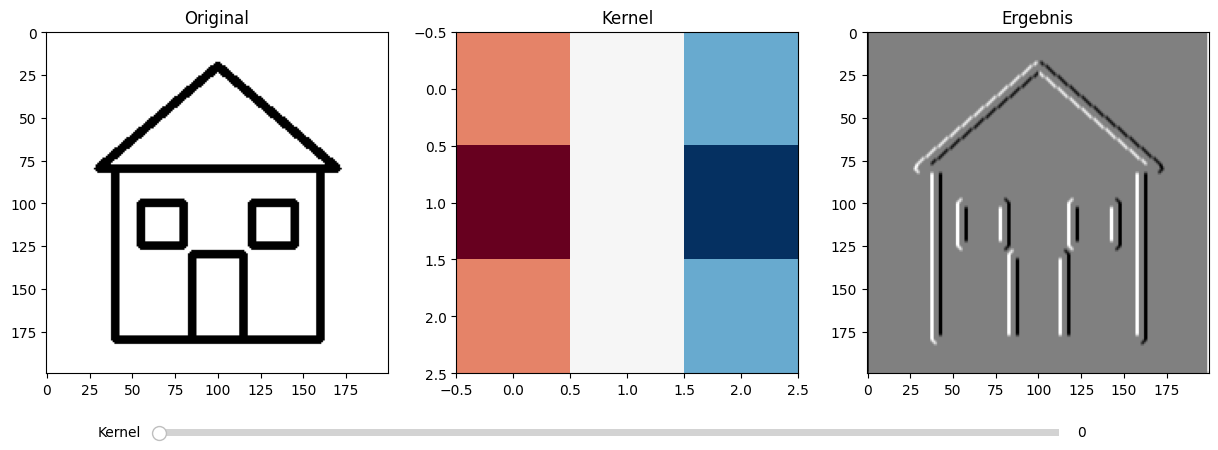

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from scipy import signal
import cv2

def create_simple_house():
    # Erstelle ein 200x200 weißes Bild
    img = np.ones((200, 200), dtype=np.uint8) * 255
    
    # Zeichne Hauswände
    cv2.rectangle(img, (40, 80), (160, 180), 0, 3)
    
    # Zeichne Dach
    pts = np.array([[30, 80], [100, 20], [170, 80]], np.int32)
    cv2.polylines(img, [pts], True, 0, 3)
    
    # Zeichne Tür
    cv2.rectangle(img, (85, 130), (115, 180), 0, 3)
    
    # Zeichne Fenster
    cv2.rectangle(img, (55, 100), (80, 125), 0, 3)
    cv2.rectangle(img, (120, 100), (145, 125), 0, 3)
    
    return img

def create_conv_visualization():
    # Nutze unser generiertes Haus-Bild
    img = create_simple_house()

    # Verschiedene Kernel
    kernels = {
        'Kanten (vertikal)': np.array([[-1, 0, 1],
                                      [-2, 0, 2],
                                      [-1, 0, 1]]),
        'Kanten (horizontal)': np.array([[-1, -2, -1],
                                        [0, 0, 0],
                                        [1, 2, 1]]),
        'Schärfen': np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]]),
        'Weichzeichnen': np.array([[1, 1, 1],
                                  [1, 1, 1],
                                  [1, 1, 1]]) / 9
    }

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Original')
    
    # Kernel
    kernel_img = axes[1].imshow(kernels['Kanten (vertikal)'], cmap='RdBu')
    axes[1].set_title('Kernel')
    
    # Ergebnis
    result = signal.convolve2d(img, kernels['Kanten (vertikal)'], mode='same')
    result_img = axes[2].imshow(result, cmap='gray')
    axes[2].set_title('Ergebnis')

    # Slider für Kernel-Auswahl
    ax_slider = plt.axes([0.2, 0.02, 0.6, 0.03])
    slider = Slider(ax_slider, 'Kernel', 0, len(kernels)-1, 
                   valinit=0, valstep=1)

    kernel_names = list(kernels.keys())
    
    def update(val):
        kernel_name = kernel_names[int(val)]
        kernel = kernels[kernel_name]
        kernel_img.set_data(kernel)
        result = signal.convolve2d(img, kernel, mode='same')
        result_img.set_data(result)
        axes[1].set_title(f'Kernel: {kernel_name}')
        fig.canvas.draw_idle()

    slider.on_changed(update)
    plt.show()

create_conv_visualization()

## Pooling (Herauszoomen)

## Strides and Padding

## Resnet

## YOLO

## Segmentierung UNET

## Transfer Learning

# Wie Netze Sequenzen verarbeiten (RNNs)

### RNN

In [2]:
import plotly.graph_objects as go
import numpy as np

# Konstanten
NODE_SIZE = dict(
    input=40,
    hidden=60,
    output=40
)

COLORS = dict(
    input='rgba(173, 216, 230, 0.7)',      # hellblau
    hidden='rgba(144, 238, 144, 0.7)',     # hellgrün
    output='rgba(250, 128, 114, 0.7)',     # lachs
    recurrent='rgba(218, 112, 214, 0.7)',  # orchidee
    lines='rgba(128, 128, 128, 0.4)'       # grau
)

# Positionen für die Zeitschritte
TIMESTEPS = 3
X_SPACING = 3
Y_SPACING = 2

# Figure erstellen
fig = go.Figure()

# Funktion zum Hinzufügen von Nodes
def add_node(x, y, node_type, text, show_legend=True):
    return fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE[node_type],
            color=COLORS[node_type],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=text,
        textposition='middle center',
        name=node_type.capitalize() if show_legend else None,
        showlegend=show_legend
    ))

# Funktion zum Hinzufügen von Verbindungen
def add_connection(x1, y1, x2, y2, color=COLORS['lines'], width=2):
    fig.add_trace(go.Scatter(
        x=[x1, x2],
        y=[y1, y2],
        mode='lines',
        line=dict(color=color, width=width),
        showlegend=False
    ))

# Nodes für jeden Zeitschritt hinzufügen
for t in range(TIMESTEPS):
    # Input node
    add_node(
        x=t * X_SPACING,
        y=0,
        node_type='input',
        text=f'x{t}',
        show_legend=(t == 0)
    )
    
    # Hidden state node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING,
        node_type='hidden',
        text=f'h{t}',
        show_legend=(t == 0)
    )
    
    # Output node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING * 2,
        node_type='output',
        text=f'y{t}',
        show_legend=(t == 0)
    )
    
    # Verbindungen innerhalb eines Zeitschritts
    # Input zu Hidden
    add_connection(
        t * X_SPACING,
        0,
        t * X_SPACING,
        Y_SPACING
    )
    
    # Hidden zu Output
    add_connection(
        t * X_SPACING,
        Y_SPACING,
        t * X_SPACING,
        Y_SPACING * 2
    )
    
    # Rekurrente Verbindung zum nächsten Zeitschritt
    if t < TIMESTEPS - 1:
        add_connection(
            t * X_SPACING,
            Y_SPACING,
            (t + 1) * X_SPACING,
            Y_SPACING,
            color=COLORS['recurrent'],
            width=3
        )

# Formelbox hinzufügen
formula = """
h_t = tanh(W_h · h_{t-1} + W_x · x_t + b_h)
y_t = W_y · h_t + b_y
"""

fig.add_annotation(
    x=TIMESTEPS * X_SPACING / 2,
    y=Y_SPACING * 2.5,
    text=formula,
    showarrow=False,
    font=dict(size=14, family='Computer Modern'),
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=10
)

# Layout
fig.update_layout(
    title=dict(
        text='Rekurrentes Neuronales Netz (RNN) über drei Zeitschritte',
        x=0.5,
        y=0.95,
        font=dict(size=16)
    ),
    showlegend=True,
    xaxis=dict(
        showticklabels=False,
        range=[-1, TIMESTEPS * X_SPACING + 1]
    ),
    yaxis=dict(
        showticklabels=False,
        range=[-1, Y_SPACING * 2.5 + 1]
    ),
    plot_bgcolor='white',
    width=1000,
    height=600,
    margin=dict(t=100, b=50)
)

fig.show()

In [6]:
# Erste Stunde (Mathe, 8 Uhr)
x_0 = [1, 8]        # 1. Stunde, Mathe (Schwierigkeit 8)
h_0 = [0.9]         # Schüler startet ausgeruht
y_0 = 0.9          # Hohe Konzentration

# Zweite Stunde (Sport, 9 Uhr)
x_1 = [2, 3]        # 2. Stunde, Sport (Schwierigkeit 3)
h_1 = [0.7]         # Etwas erschöpft von Mathe
y_1 = 0.85        # Noch gute Konzentration

# Dritte Stunde (Physik, 10 Uhr)
x_2 = [3, 7]        # 3. Stunde, Physik (Schwierigkeit 7)
h_2 = [0.4]         # Deutlich erschöpfter
y_2 = 0.6          # Konzentration lässt nach

In [7]:
import plotly.graph_objects as go
import numpy as np

# Konstanten
NODE_SIZE = dict(
    input=50,
    hidden=70,
    output=50
)

COLORS = dict(
    input='rgba(173, 216, 230, 0.7)',      # hellblau
    hidden='rgba(144, 238, 144, 0.7)',     # hellgrün
    output='rgba(250, 128, 114, 0.7)',     # lachs
    recurrent='rgba(218, 112, 214, 0.7)',  # orchidee
    lines='rgba(128, 128, 128, 0.4)',      # grau
    weights='rgba(255, 165, 0, 0.7)'       # orange für Gewichte
)

# Positionen für die Zeitschritte
TIMESTEPS = 3
X_SPACING = 4  # Erhöht für mehr Platz
Y_SPACING = 2.5  # Erhöht für mehr Platz

# Figure erstellen
fig = go.Figure()

# Funktion zum Hinzufügen von Nodes mit Werten
def add_node(x, y, node_type, main_text, value_text="", show_legend=True):
    text = f"{main_text}<br>{value_text}" if value_text else main_text
    return fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE[node_type],
            color=COLORS[node_type],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=text,
        textposition='middle center',
        name=node_type.capitalize() if show_legend else None,
        showlegend=show_legend
    ))

# Funktion zum Hinzufügen von Verbindungen mit Gewichtstext
def add_connection(x1, y1, x2, y2, weight_text=None, color=COLORS['lines'], width=2):
    fig.add_trace(go.Scatter(
        x=[x1, x2],
        y=[y1, y2],
        mode='lines',
        line=dict(color=color, width=width),
        showlegend=False
    ))
    
    if weight_text:
        x_mid = (x1 + x2) / 2
        y_mid = (y1 + y2) / 2
        
        fig.add_trace(go.Scatter(
            x=[x_mid],
            y=[y_mid],
            mode='markers+text',
            marker=dict(
                size=30,
                color=COLORS['weights']
            ),
            text=weight_text,
            textposition='middle center',
            showlegend=False
        ))

# Input Werte für jede Stunde
inputs = [
    "1. Stunde (Mathe)\n[1, 8]",
    "2. Stunde (Sport)\n[2, 3]",
    "3. Stunde (Physik)\n[3, 7]"
]

# Hidden States (Energielevel)
hidden_states = [
    "Energielevel\n0.9",
    "Energielevel\n0.7",
    "Energielevel\n0.4"
]

# Outputs (Konzentration)
outputs = [
    "Konzentration\n90%",
    "Konzentration\n85%",
    "Konzentration\n60%"
]

# Nodes für jeden Zeitschritt hinzufügen
for t in range(TIMESTEPS):
    # Input node
    add_node(
        x=t * X_SPACING,
        y=0,
        node_type='input',
        main_text=inputs[t],
        show_legend=(t == 0)
    )
    
    # Hidden state node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING,
        node_type='hidden',
        main_text=hidden_states[t],
        show_legend=(t == 0)
    )
    
    # Output node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING * 2,
        node_type='output',
        main_text=outputs[t],
        show_legend=(t == 0)
    )
    
    # Verbindungen innerhalb eines Zeitschritts
    add_connection(
        t * X_SPACING,
        0,
        t * X_SPACING,
        Y_SPACING,
        weight_text='W_x'
    )
    
    add_connection(
        t * X_SPACING,
        Y_SPACING,
        t * X_SPACING,
        Y_SPACING * 2,
        weight_text='W_y'
    )
    
    if t < TIMESTEPS - 1:
        add_connection(
            t * X_SPACING,
            Y_SPACING,
            (t + 1) * X_SPACING,
            Y_SPACING,
            weight_text='W_h',
            color=COLORS['recurrent'],
            width=3
        )

# Erklärungsbox
fig.add_annotation(
    x=-1,
    y=-1,
    text='Inputs pro Stunde: [Stunde, Schwierigkeit]<br>' + 
         'Hidden State: Energielevel (0-1)<br>' +
         'Output: Konzentration (0-100%)<br>' +
         'W_x: Einfluss der aktuellen Stunde<br>' +
         'W_h: Übertragung der Müdigkeit<br>' +
         'W_y: Umrechnung in Konzentration',
    showarrow=False,
    font=dict(size=12),
    align='left',
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=10
)

# Layout
fig.update_layout(
    title=dict(
        text='RNN für Schülerkonzentration über den Schultag',
        x=0.5,
        y=0.95,
        font=dict(size=16)
    ),
    showlegend=True,
    xaxis=dict(
        showticklabels=False,
        range=[-1.5, TIMESTEPS * X_SPACING + 1]
    ),
    yaxis=dict(
        showticklabels=False,
        range=[-1.5, Y_SPACING * 2.5 + 1]
    ),
    plot_bgcolor='white',
    width=1200,  # Breiter für bessere Lesbarkeit
    height=700,  # Höher für bessere Lesbarkeit
    margin=dict(t=100, b=50)
)

fig.show()

In [3]:
import plotly.graph_objects as go
import numpy as np

# Konstanten
NODE_SIZE = dict(
    input=40,
    hidden=60,
    output=40
)

COLORS = dict(
    input='rgba(173, 216, 230, 0.7)',      # hellblau
    hidden='rgba(144, 238, 144, 0.7)',     # hellgrün
    output='rgba(250, 128, 114, 0.7)',     # lachs
    recurrent='rgba(218, 112, 214, 0.7)',  # orchidee
    lines='rgba(128, 128, 128, 0.4)',      # grau
    weights='rgba(255, 165, 0, 0.7)'       # orange für Gewichte
)

# Positionen für die Zeitschritte
TIMESTEPS = 3
X_SPACING = 3
Y_SPACING = 2

# Figure erstellen
fig = go.Figure()

# Funktion zum Hinzufügen von Nodes
def add_node(x, y, node_type, text, show_legend=True):
    return fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE[node_type],
            color=COLORS[node_type],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=text,
        textposition='middle center',
        name=node_type.capitalize() if show_legend else None,
        showlegend=show_legend
    ))

# Funktion zum Hinzufügen von Verbindungen mit Gewichtstext
def add_connection(x1, y1, x2, y2, weight_text=None, color=COLORS['lines'], width=2):
    # Verbindungslinie
    fig.add_trace(go.Scatter(
        x=[x1, x2],
        y=[y1, y2],
        mode='lines',
        line=dict(color=color, width=width),
        showlegend=False
    ))
    
    # Gewichtstext, wenn angegeben
    if weight_text:
        # Berechne Mittelpunkt
        x_mid = (x1 + x2) / 2
        y_mid = (y1 + y2) / 2
        
        # Füge Gewichtstext hinzu
        fig.add_trace(go.Scatter(
            x=[x_mid],
            y=[y_mid],
            mode='markers+text',
            marker=dict(
                size=30,
                color=COLORS['weights']
            ),
            text=weight_text,
            textposition='middle center',
            showlegend=False
        ))

# Nodes für jeden Zeitschritt hinzufügen
for t in range(TIMESTEPS):
    # Input node
    add_node(
        x=t * X_SPACING,
        y=0,
        node_type='input',
        text=f'x{t}',
        show_legend=(t == 0)
    )
    
    # Hidden state node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING,
        node_type='hidden',
        text=f'h{t}',
        show_legend=(t == 0)
    )
    
    # Output node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING * 2,
        node_type='output',
        text=f'y{t}',
        show_legend=(t == 0)
    )
    
    # Verbindungen innerhalb eines Zeitschritts
    # Input zu Hidden (immer mit W_x)
    add_connection(
        t * X_SPACING,
        0,
        t * X_SPACING,
        Y_SPACING,
        weight_text='W_x'
    )
    
    # Hidden zu Output (immer mit W_y)
    add_connection(
        t * X_SPACING,
        Y_SPACING,
        t * X_SPACING,
        Y_SPACING * 2,
        weight_text='W_y'
    )
    
    # Rekurrente Verbindung zum nächsten Zeitschritt (immer mit W_h)
    if t < TIMESTEPS - 1:
        add_connection(
            t * X_SPACING,
            Y_SPACING,
            (t + 1) * X_SPACING,
            Y_SPACING,
            weight_text='W_h',
            color=COLORS['recurrent'],
            width=3
        )

# Legende für die Gewichte
fig.add_annotation(
    x=-1,
    y=-1,
    text='Gewichte:<br>W_x: Input → Hidden<br>W_h: Hidden → Hidden (rekurrent)<br>W_y: Hidden → Output<br>Alle Gewichte werden über Zeitschritte wiederverwendet!',
    showarrow=False,
    font=dict(size=12),
    align='left',
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=10
)

# Formelbox
formula = """
h_t = tanh(W_h · h_{t-1} + W_x · x_t + b_h)
y_t = W_y · h_t + b_y
Gleiche W_x, W_h, W_y für alle Zeitschritte!
"""

fig.add_annotation(
    x=TIMESTEPS * X_SPACING / 2,
    y=Y_SPACING * 2.5,
    text=formula,
    showarrow=False,
    font=dict(size=14, family='Computer Modern'),
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=10
)

# Layout
fig.update_layout(
    title=dict(
        text='Rekurrentes Neuronales Netz (RNN) mit wiederverwendeten Gewichten',
        x=0.5,
        y=0.95,
        font=dict(size=16)
    ),
    showlegend=True,
    xaxis=dict(
        showticklabels=False,
        range=[-1.5, TIMESTEPS * X_SPACING + 1]
    ),
    yaxis=dict(
        showticklabels=False,
        range=[-1.5, Y_SPACING * 2.5 + 1]
    ),
    plot_bgcolor='white',
    width=1000,
    height=600,
    margin=dict(t=100, b=50)
)

fig.show()

### GRU

### LSTM